# K-Nearest Neighbors Algorithm (K-NN)

This algorithm seeks to classify an item based on its euclidean distance using inputs variables to the nearest classified items. We will use the iris dataset found in R to demonstrate how this algorithm works. We will attempt to predict the type of iris based on its sepal length, sepal width, petal length, and petal width.

In [33]:
library(ggplot2)

In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


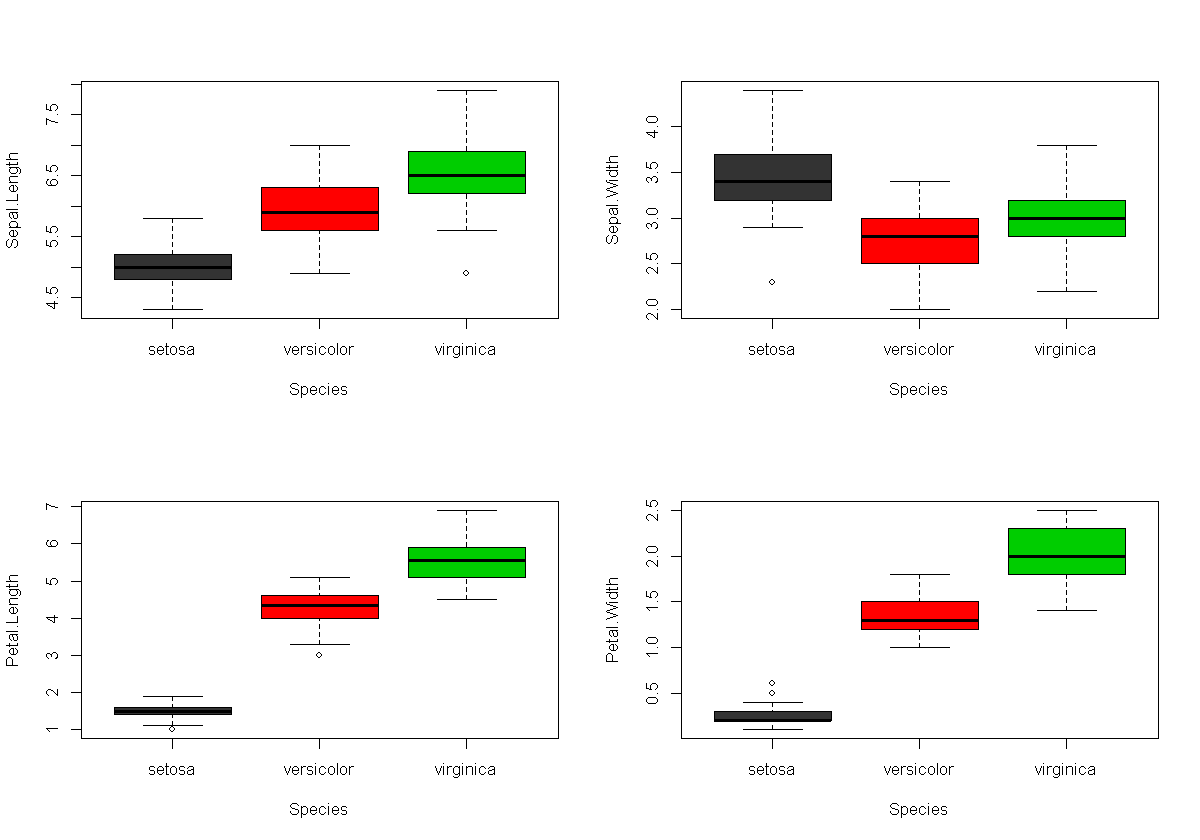

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)
par(mfrow = c(2,2))

plot(Sepal.Length ~ Species, col=c(grey(.2),2:6), data = iris)
plot(Sepal.Width ~ Species, col=c(grey(.2),2:6), data = iris)
plot(Petal.Length ~ Species, col=c(grey(.2),2:6), data = iris)
plot(Petal.Width ~ Species, col=c(grey(.2),2:6), data = iris)

Scale data so that distances are in standard deviations
- make numerica and scale
- convert columns to mean-zero sd-one (assumption of normality)
- column 5 is the species label so want to scale the first 4 columns

In [5]:
x <- scale(iris[,1:4]) 
apply(x,2, sd)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

In [6]:
summary(x)

  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86378   Min.   :-2.4258   Min.   :-1.5623   Min.   :-1.4422  
 1st Qu.:-0.89767   1st Qu.:-0.5904   1st Qu.:-1.2225   1st Qu.:-1.1799  
 Median :-0.05233   Median :-0.1315   Median : 0.3354   Median : 0.1321  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5567   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.0805   Max.   : 1.7799   Max.   : 1.7064  

In [21]:
test <- sample(1:150,20) #take a random test sample of 10 rows
test

[1]  69 102  25  79 127  55  22  75 121 115  93  20  89  81 134  23  24  57  50
[20]  99

In [22]:
head(x[-test,]) #remove the test sample from the data set x. this is the training set

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


In [23]:
#Load class library to get K-NN classifier
library(class)

#Run a K-NN using 1 nearest neighbor to classify item
nearest1 <- knn(train=x[-test,], test=x[test,], cl=iris$Species[-test], k=1)
#Run a K-NN using 5 nearest neighbors to classify item
nearest5 <- knn(train=x[-test,], test=x[test,], cl=iris$Species[-test], k=5)
#Run a K-NN using 10 nearest neighbors to classify item
nearest10 <- knn(train=x[-test,], test=x[test,], cl=iris$Species[-test], k=10)
#Run a K-NN using 50 nearest neighbors to classify item
nearest50 <- knn(train=x[-test,], test=x[test,], cl=iris$Species[-test], k=50)


In [24]:
##View results of each classifier
results = data.frame(iris$Species[test],nearest1,nearest5,nearest10,nearest50)
results

iris.Species.test.,nearest1,nearest5,nearest10,nearest50
versicolor,virginica,versicolor,versicolor,versicolor
virginica,virginica,virginica,virginica,versicolor
setosa,setosa,setosa,setosa,setosa
versicolor,versicolor,versicolor,versicolor,versicolor
virginica,virginica,virginica,virginica,versicolor
versicolor,versicolor,versicolor,versicolor,versicolor
setosa,setosa,setosa,setosa,setosa
versicolor,versicolor,versicolor,versicolor,versicolor
virginica,virginica,virginica,virginica,virginica
virginica,virginica,virginica,virginica,virginica


In [25]:
# Create a cross table of predictions for each knn group
knn1tab <- table(nearest1,results$iris.Species.test.)
knn5tab <- table(nearest5,results$iris.Species.test.)
knn10tab <- table(nearest10,results$iris.Species.test.)
knn50tab <- table(nearest50,results$iris.Species.test.)
tables <- list(knn1tab, knn5tab, knn10tab, knn50tab)

In [26]:
# Function summing up the diagonals to calculate accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}

In [27]:
knngroup <- c(names(results[,-1]))
knngroups <- data.frame(knngroup)

In [28]:
i <- 1
scores <- vector()

while (i < length(knngroup)) {
    for (tab in tables){
        scores[i] <- accuracy(tab)
        i <- i+1
    }    
}

In [31]:
newResults <- cbind(knngroups, scores)
newResults$knngroup <- factor(newResults$knngroup, levels = newResults$knngroup[order(newResults$scores)])
newResults

knngroup,scores
nearest1,90
nearest5,95
nearest10,95
nearest50,80


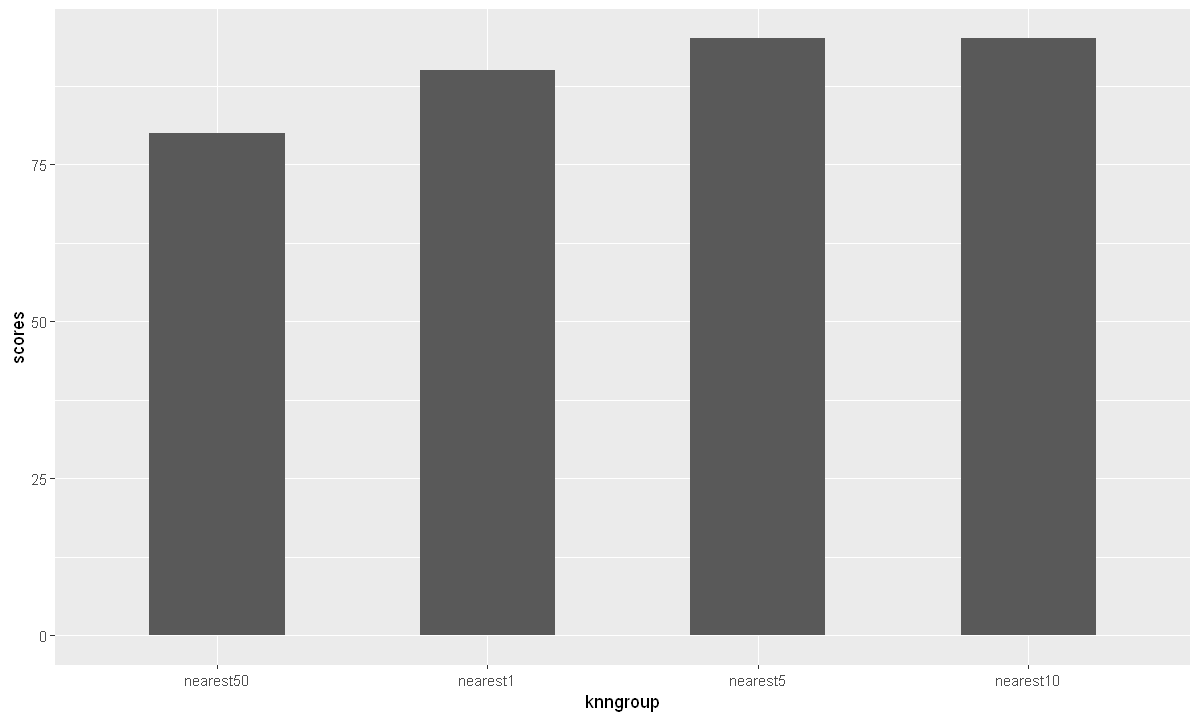

In [32]:
# options(repr.plot.width = 10, repr.plot.height = 6)
# barplot(scores ~ knngroup, data = newResults,beside=TRUE)

ggplot(newResults, aes(x = knngroup, y = scores)) + geom_bar(stat = "identity", width = 0.5)